In [7]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,adjusted_rand_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import numpy as np
from sklearn.model_selection import train_test_split

In [14]:
wine = load_wine()
X = wine.data
y = wine.target


scaler = StandardScaler()
X = scaler.fit_transform(X)

# this is only to show the data visually
wine_copy = load_wine(as_frame=True)
wine_data = wine_copy.data
wine_data.describe()    


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


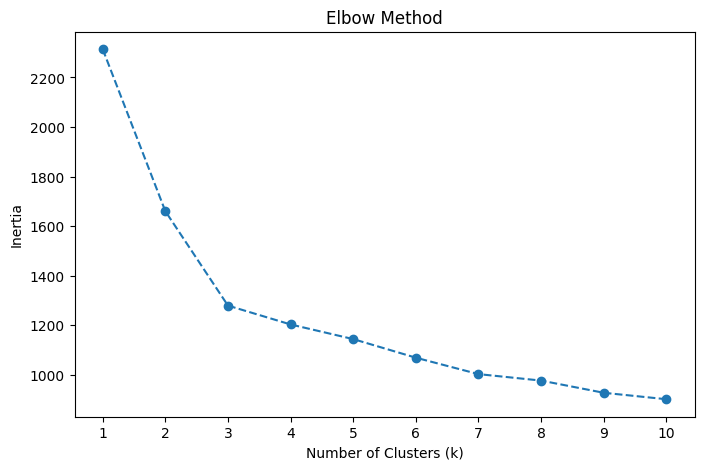

In [9]:

inertias = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)


Accuracy: 0.97
(ARI): 0.93


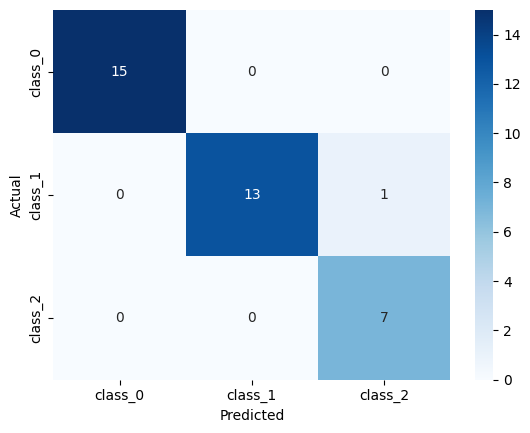

In [11]:
# Map cluster labels to match true labels
labels = np.zeros_like(y_pred)
for i in range(3):  
    mask = (y_pred == i)
    labels[mask] = mode(y_test[mask])[0]
    
    
accuracy = accuracy_score(y_test, labels)
ari = adjusted_rand_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"(ARI): {ari:.2f}")

conf_matrix = confusion_matrix(y_test, labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

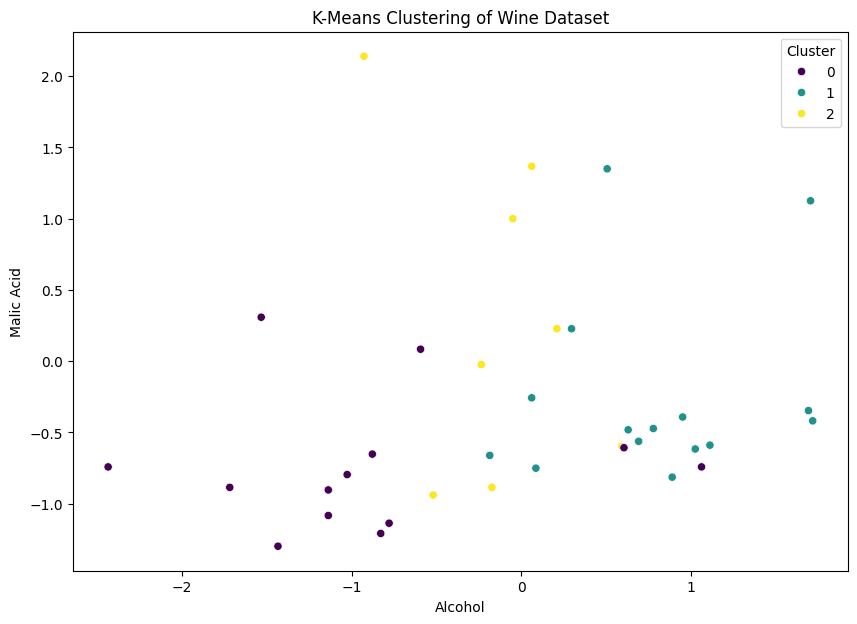

In [12]:
df = pd.DataFrame(data=X_test, columns=wine.feature_names)
df['Cluster'] = y_pred


plt.figure(figsize=(10, 7))
sns.scatterplot(x='alcohol', y='malic_acid', hue='Cluster', palette='viridis', data=df, legend='full')
plt.title('K-Means Clustering of Wine Dataset')
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.show()